# Ensemble Techniques Project: To classify the patients into the respective labels

# 1. Import the necessary libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import copy

C:\Users\Ashish\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Read the data as a data frame (Data - Parkinsons.csv)

In [2]:
# Read the data into Data Frame
# Head returns the first 5 rows of the dataframe to have initial glance at the data and review the data format
data=pd.read_csv("Data - Parkinsons.data")
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [3]:
data.tail()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[5 rows x 24 columns]

In [4]:
#DataFlair - Get the features and labels
features=data.loc[:,data.columns!='status'].values[:,1:]
labels=data.loc[:,'status'].values

In [5]:
#DataFlair - Get the count of each label (0 and 1) in labels
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


# 3. Exploratory Data Analysis

# a. Shape of the data

In [6]:
# Shape of the data: Print the number of rows and columns to give dimensions of the data
data.shape

(195, 24)

# b. Data Information 

In [7]:
# Data Info: Print the information on data type and presence of null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Attribute Information:

The dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals.      
       
name - ASCII subject name and recording number     
MDVP:Fo(Hz) - Average vocal fundamental frequency      
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency     
MDVP:Flo(Hz) - Minimum vocal fundamental frequency      
MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency     
MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA - Several measures of variation in amplitude     
NHR, HNR - Two measures of ratio of noise to tonal components in the voice     
**status - Health status of the individual (one) - Parkinson's disease detected, (zero) - healthy**     
RPDE, D2 - Two nonlinear dynamical complexity measures     
DFA - Signal fractal scaling exponent     
spread1, spread2, PPE - Three nonlinear measures of fundamental frequency variation      

# c. Checking the presence of missing values 

In [8]:
# Presence of missing values using isnull function
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
data.isnull().values.any()

False

In [10]:
# check whether the column has any value other than numeric values
data.iloc[:,1:][~data.iloc[:,1:].applymap(np.isreal).all(1)]

Empty DataFrame
Columns: [MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, status, RPDE, DFA, spread1, spread2, D2, PPE]
Index: []

[0 rows x 23 columns]

#### Analysis
There is no presence of null which implies there is **no empty or NaN**    
The data has **numerical values** for required columns which signifies that **no junk value** in these columns

# d. Data Columns and Description

In [11]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [12]:
# Describe the data to understand the attributes and their statistical properties
data.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [13]:
#finding unique data
data.apply(lambda x: len(x.unique()))

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [14]:
data["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

In [15]:
data["MDVP:Jitter(Abs)"].value_counts()

0.000030    46
0.000020    28
0.000040    28
0.000010    20
0.000050    17
0.000060    16
0.000080     9
0.000070     8
0.000009     5
0.000090     5
0.000100     3
0.000150     2
0.000110     2
0.000007     1
0.000260     1
0.000120     1
0.000140     1
0.000160     1
0.000220     1
Name: MDVP:Jitter(Abs), dtype: int64

#### Analysis
**status** is the target variable with only two values of **1** (Parkinson's Disease positive) and **0** (negative or healthy). There is **class imbalance** in the data with 75% of data given for positive cases and may have impact on model accuracy for predicting the disease.

**MDVP:Jitter(Abs)** is the only other variable having repeat values.     
     
All other variables have unique values for each data row. 

# e. Data Distribution of all attributes

### Univariate Analysis: Plot the columns to visually understand the distribution of the data

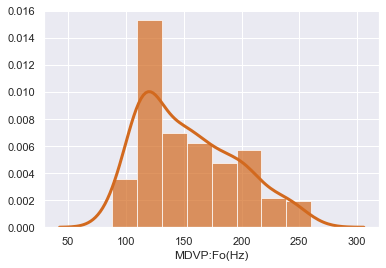

In [16]:
# Average vocal fundamental frequency
sns.distplot(data['MDVP:Fo(Hz)'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="chocolate")
plt.show()

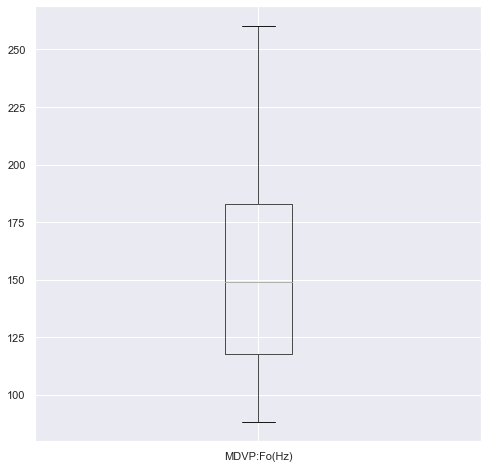

In [17]:
data.boxplot(column="MDVP:Fo(Hz)",return_type='axes',figsize=(8,8))

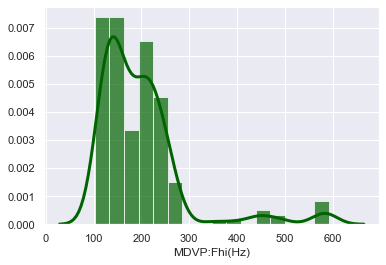

In [18]:
# Maximum vocal fundamental frequency 
sns.distplot(data['MDVP:Fhi(Hz)'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="darkgreen")
plt.show()

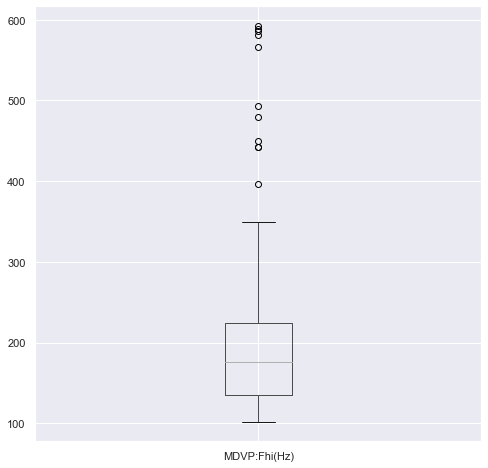

In [19]:
data.boxplot(column="MDVP:Fhi(Hz)",return_type='axes',figsize=(8,8))

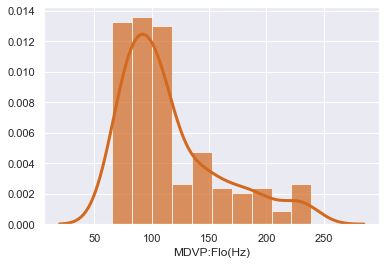

In [20]:
# Minimum vocal fundamental frequency 
sns.distplot(data['MDVP:Flo(Hz)'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="chocolate")
plt.show()

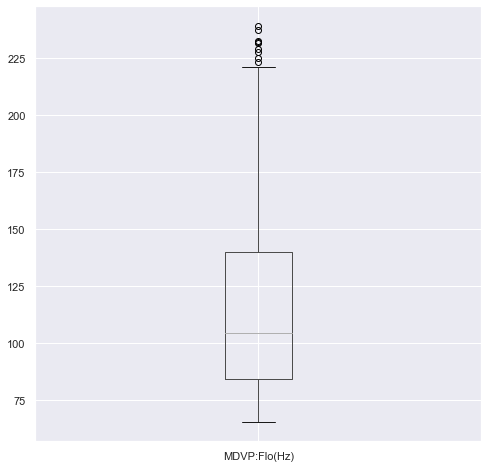

In [21]:
data.boxplot(column="MDVP:Flo(Hz)",return_type='axes',figsize=(8,8))

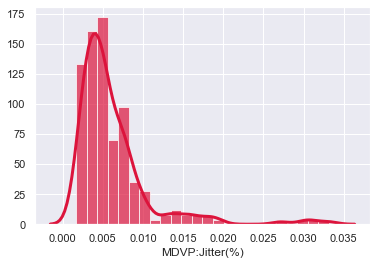

In [22]:
# Several measures of variation in fundamental frequency 
sns.distplot(data['MDVP:Jitter(%)'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="crimson")
plt.show()

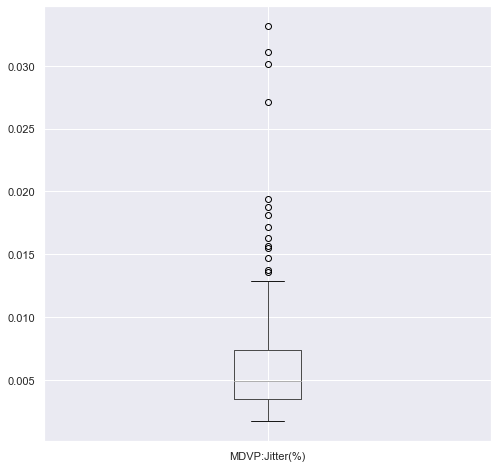

In [23]:
data.boxplot(column="MDVP:Jitter(%)",return_type='axes',figsize=(8,8))

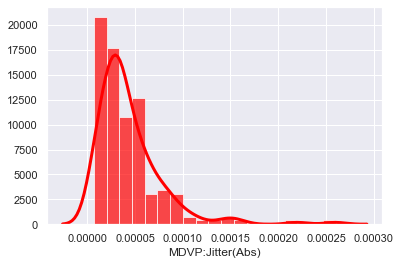

In [24]:
# Several measures of variation in fundamental frequency 
sns.distplot(data['MDVP:Jitter(Abs)'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="red")
plt.show()

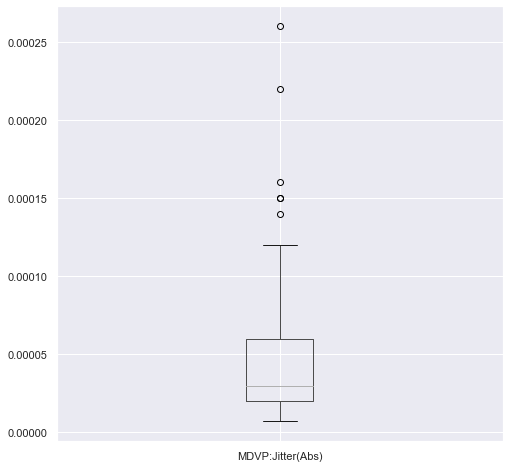

In [25]:
data.boxplot(column="MDVP:Jitter(Abs)",return_type='axes',figsize=(8,8))

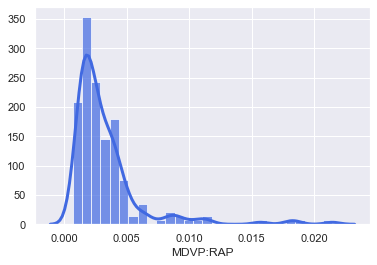

In [26]:
# Several measures of variation in fundamental frequency 
sns.distplot(data['MDVP:RAP'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="royalblue")
plt.show()

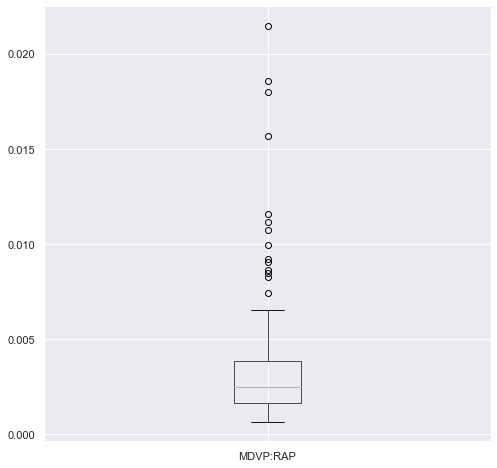

In [27]:
data.boxplot(column="MDVP:RAP",return_type='axes',figsize=(8,8))

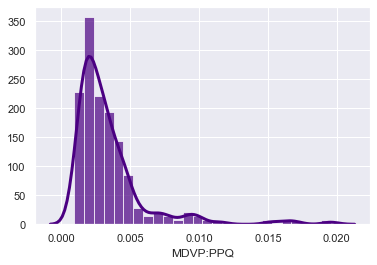

In [28]:
# Several measures of variation in fundamental frequency 
sns.distplot(data['MDVP:PPQ'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="indigo")
plt.show()

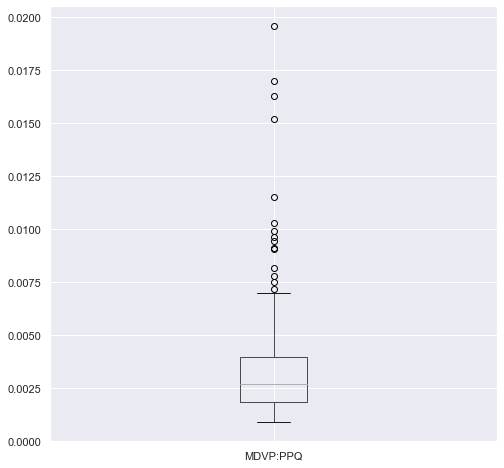

In [29]:
data.boxplot(column="MDVP:PPQ",return_type='axes',figsize=(8,8))

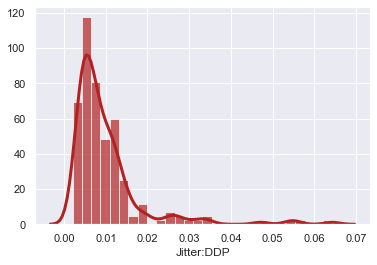

In [30]:
# Several measures of variation in fundamental frequency 
sns.distplot(data['Jitter:DDP'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="firebrick")
plt.show()

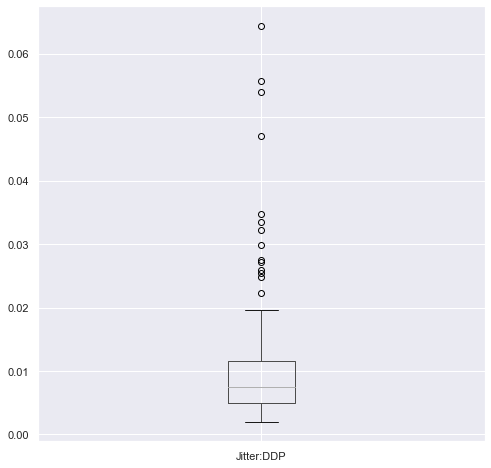

In [31]:
data.boxplot(column="Jitter:DDP",return_type='axes',figsize=(8,8))

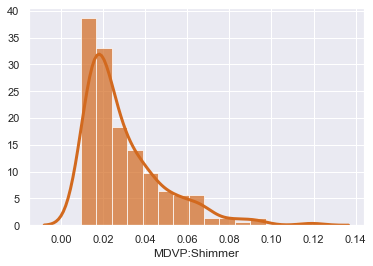

In [32]:
# Several measures of variation in amplitude 
sns.distplot(data['MDVP:Shimmer'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="chocolate")
plt.show()

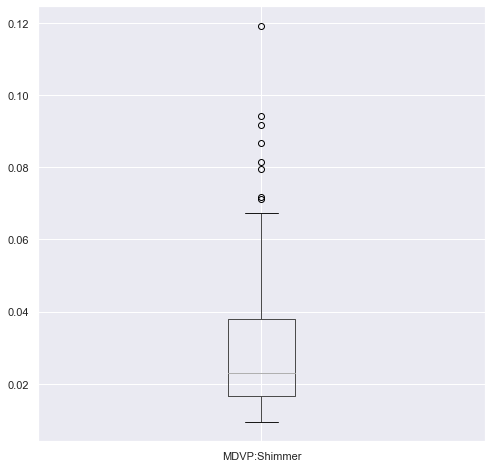

In [33]:
data.boxplot(column="MDVP:Shimmer",return_type='axes',figsize=(8,8))

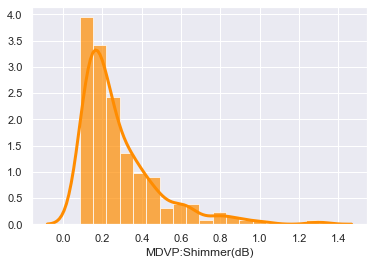

In [34]:
# Several measures of variation in amplitude 
sns.distplot(data['MDVP:Shimmer(dB)'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="darkorange")
plt.show()

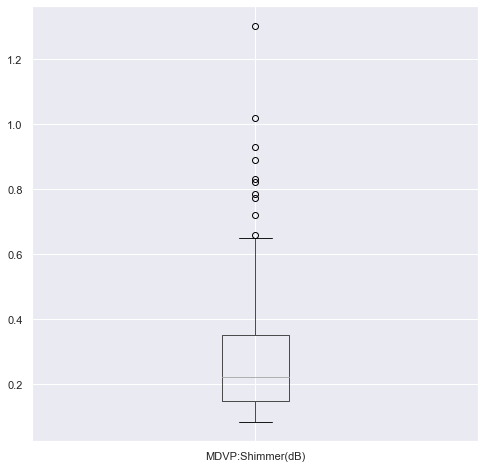

In [35]:
data.boxplot(column="MDVP:Shimmer(dB)",return_type='axes',figsize=(8,8))

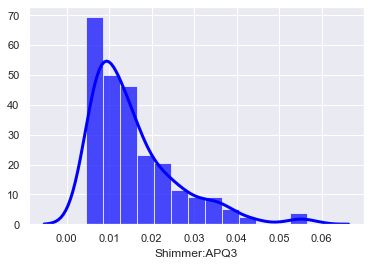

In [36]:
# Several measures of variation in amplitude 
sns.distplot(data['Shimmer:APQ3'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="blue")
plt.show()

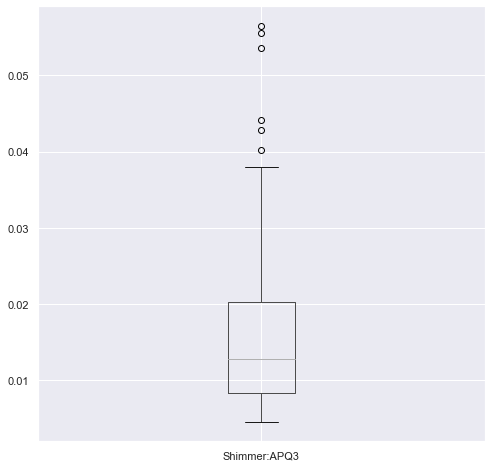

In [37]:
data.boxplot(column="Shimmer:APQ3",return_type='axes',figsize=(8,8))

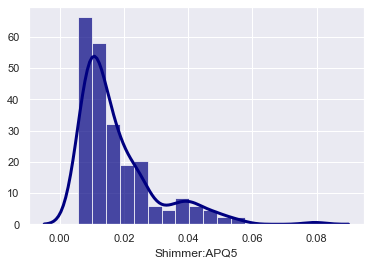

In [38]:
# Several measures of variation in amplitude 
sns.distplot(data['Shimmer:APQ5'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="navy")
plt.show()

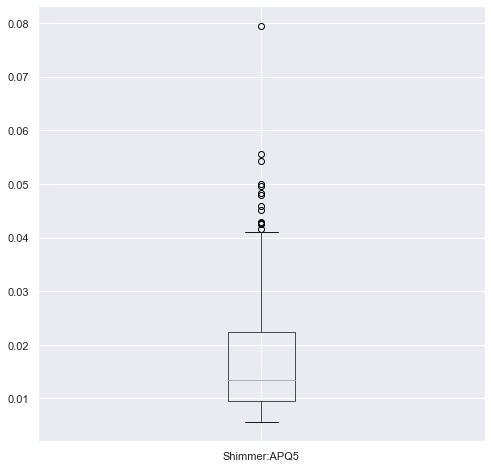

In [39]:
data.boxplot(column="Shimmer:APQ5",return_type='axes',figsize=(8,8))

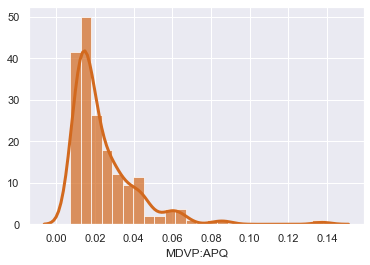

In [40]:
# Several measures of variation in amplitude 
sns.distplot(data['MDVP:APQ'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="chocolate")
plt.show()

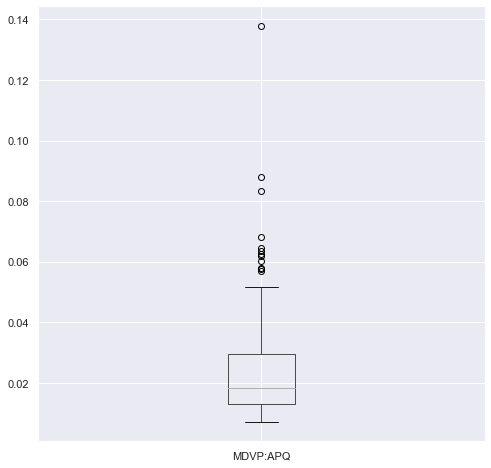

In [41]:
data.boxplot(column="MDVP:APQ",return_type='axes',figsize=(8,8))

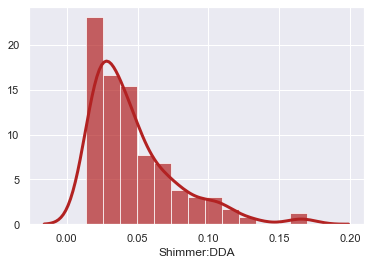

In [42]:
# Several measures of variation in amplitude  
sns.distplot(data['Shimmer:DDA'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="firebrick")
plt.show()

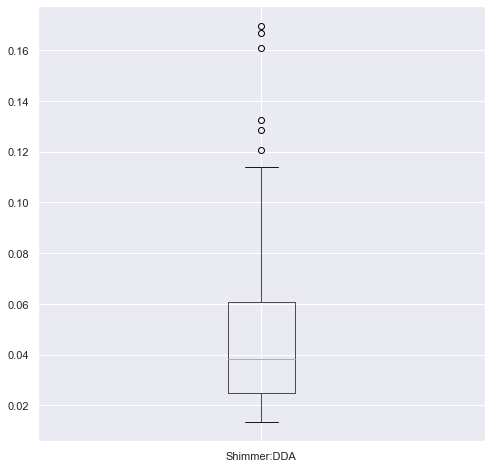

In [43]:
data.boxplot(column="Shimmer:DDA",return_type='axes',figsize=(8,8))

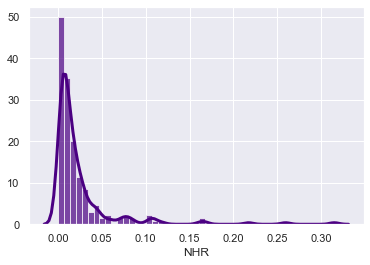

In [44]:
# Two measures of ratio of noise to tonal components in the voice 
sns.distplot(data['NHR'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="indigo")
plt.show()

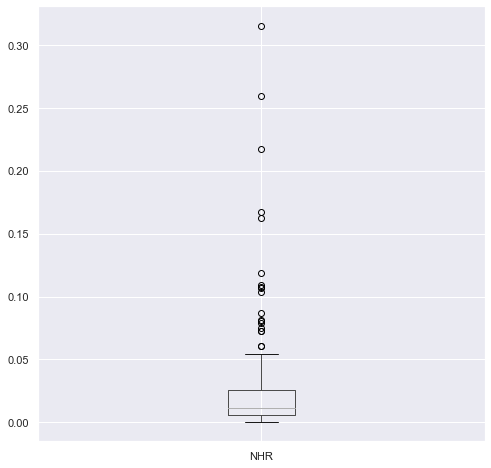

In [45]:
data.boxplot(column="NHR",return_type='axes',figsize=(8,8))

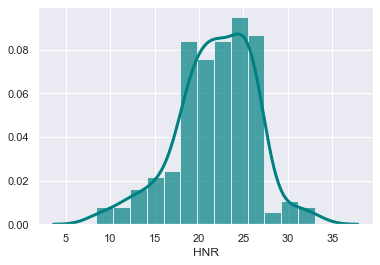

In [46]:
# Two measures of ratio of noise to tonal components in the voice 
sns.distplot(data['HNR'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="teal")
plt.show()

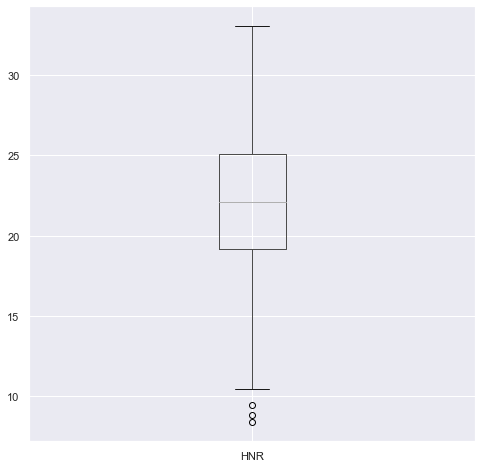

In [47]:
data.boxplot(column="HNR",return_type='axes',figsize=(8,8))

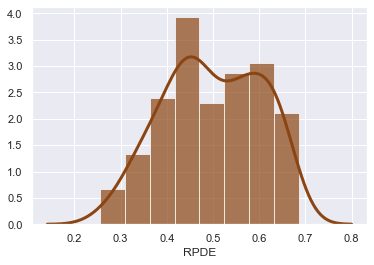

In [48]:
# Two nonlinear dynamical complexity measures 
sns.distplot(data['RPDE'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="saddlebrown")
plt.show()

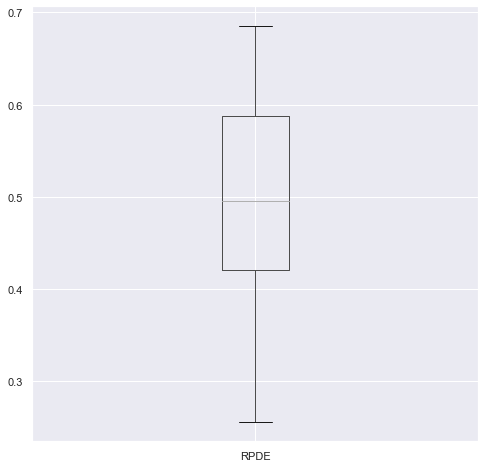

In [49]:
data.boxplot(column="RPDE",return_type='axes',figsize=(8,8))

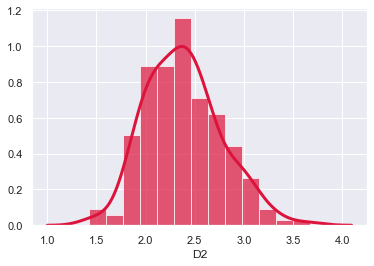

In [50]:
# Two nonlinear dynamical complexity measures 
sns.distplot(data['D2'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="crimson")
plt.show()

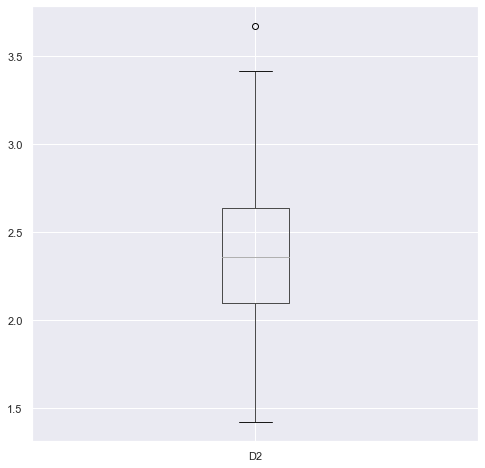

In [51]:
data.boxplot(column="D2",return_type='axes',figsize=(8,8))

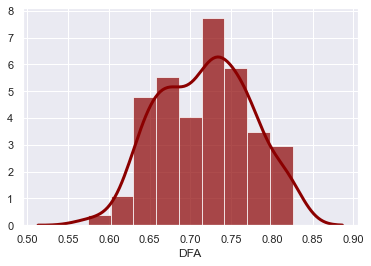

In [52]:
# Signal fractal scaling exponent 
sns.distplot(data['DFA'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="darkred")
plt.show()

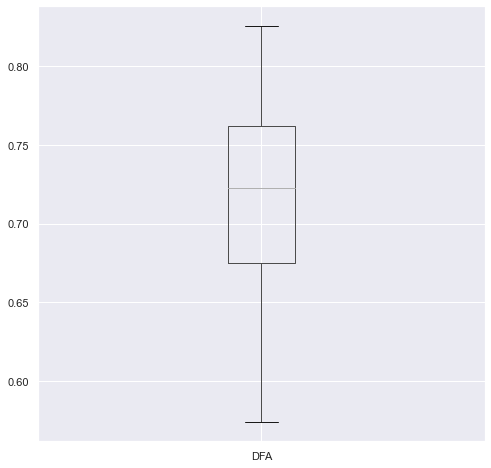

In [53]:
data.boxplot(column="DFA",return_type='axes',figsize=(8,8))

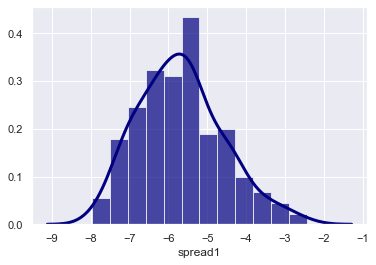

In [54]:
# Three nonlinear measures of fundamental frequency variation  
sns.distplot(data['spread1'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="navy")
plt.show()

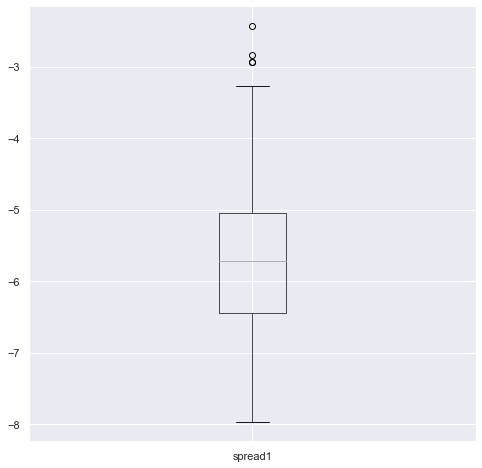

In [55]:
data.boxplot(column="spread1",return_type='axes',figsize=(8,8))

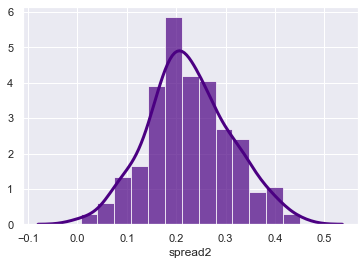

In [56]:
# Three nonlinear measures of fundamental frequency variation  
sns.distplot(data['spread2'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="indigo")
plt.show()

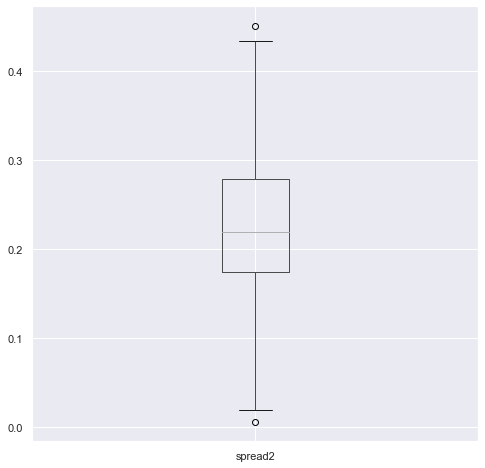

In [57]:
data.boxplot(column="spread2",return_type='axes',figsize=(8,8))

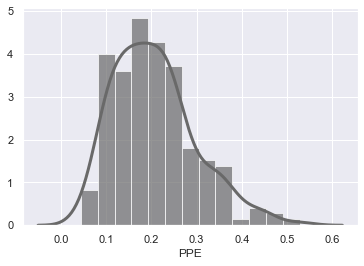

In [58]:
# Three nonlinear measures of fundamental frequency variation  
sns.distplot(data['PPE'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="dimgray")
plt.show()

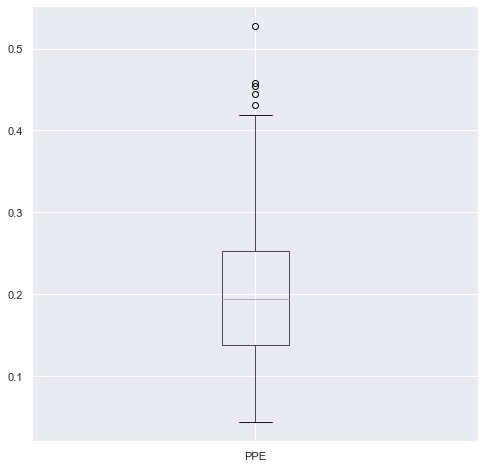

In [59]:
data.boxplot(column="PPE",return_type='axes',figsize=(8,8))

In [60]:
# Print the measure of skewness
data.skew(axis=0)

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

#### Analysis

**Analysis from the plots and skewness measurements:**     

*Variables which are **fairly symmetrical** with none and small presence of outliers*    
MDVP:Fo(Hz)    
HNR                   
RPDE   
DFA   
spread1   
spread2   
D2   
PPE 

*Variables which are **very highly skewed** and large presence of outliers*  
MDVP:Fhi(Hz)   
MDVP:Jitter(%)    
MDVP:Jitter(Abs)   
MDVP:RAP   
MDVP:PPQ   
Jitter:DDP   
MDVP:Shimmer(dB)  
Shimmer:APQ5   
MDVP:APQ   
NHR    

### Target Variable Analysis: Parkinson's Disease Status? (0/1)

In [61]:
data["status"].value_counts().to_frame()

status
1     147
0      48

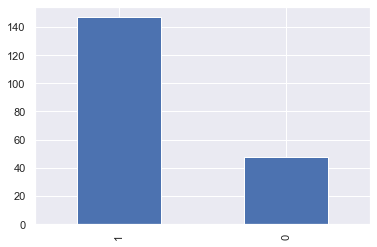

In [62]:
pd.value_counts(data["status"]).plot(kind="bar")

#### Analysis
**Target Variable - "status"**  
There is **class imbalance** in the data with 75% of data given for positive cases and may have impact on model accuracy for predicting the disease.

## Bivariate / Multivariate Analysis

### Pairplot and HeatMap to find the correlation

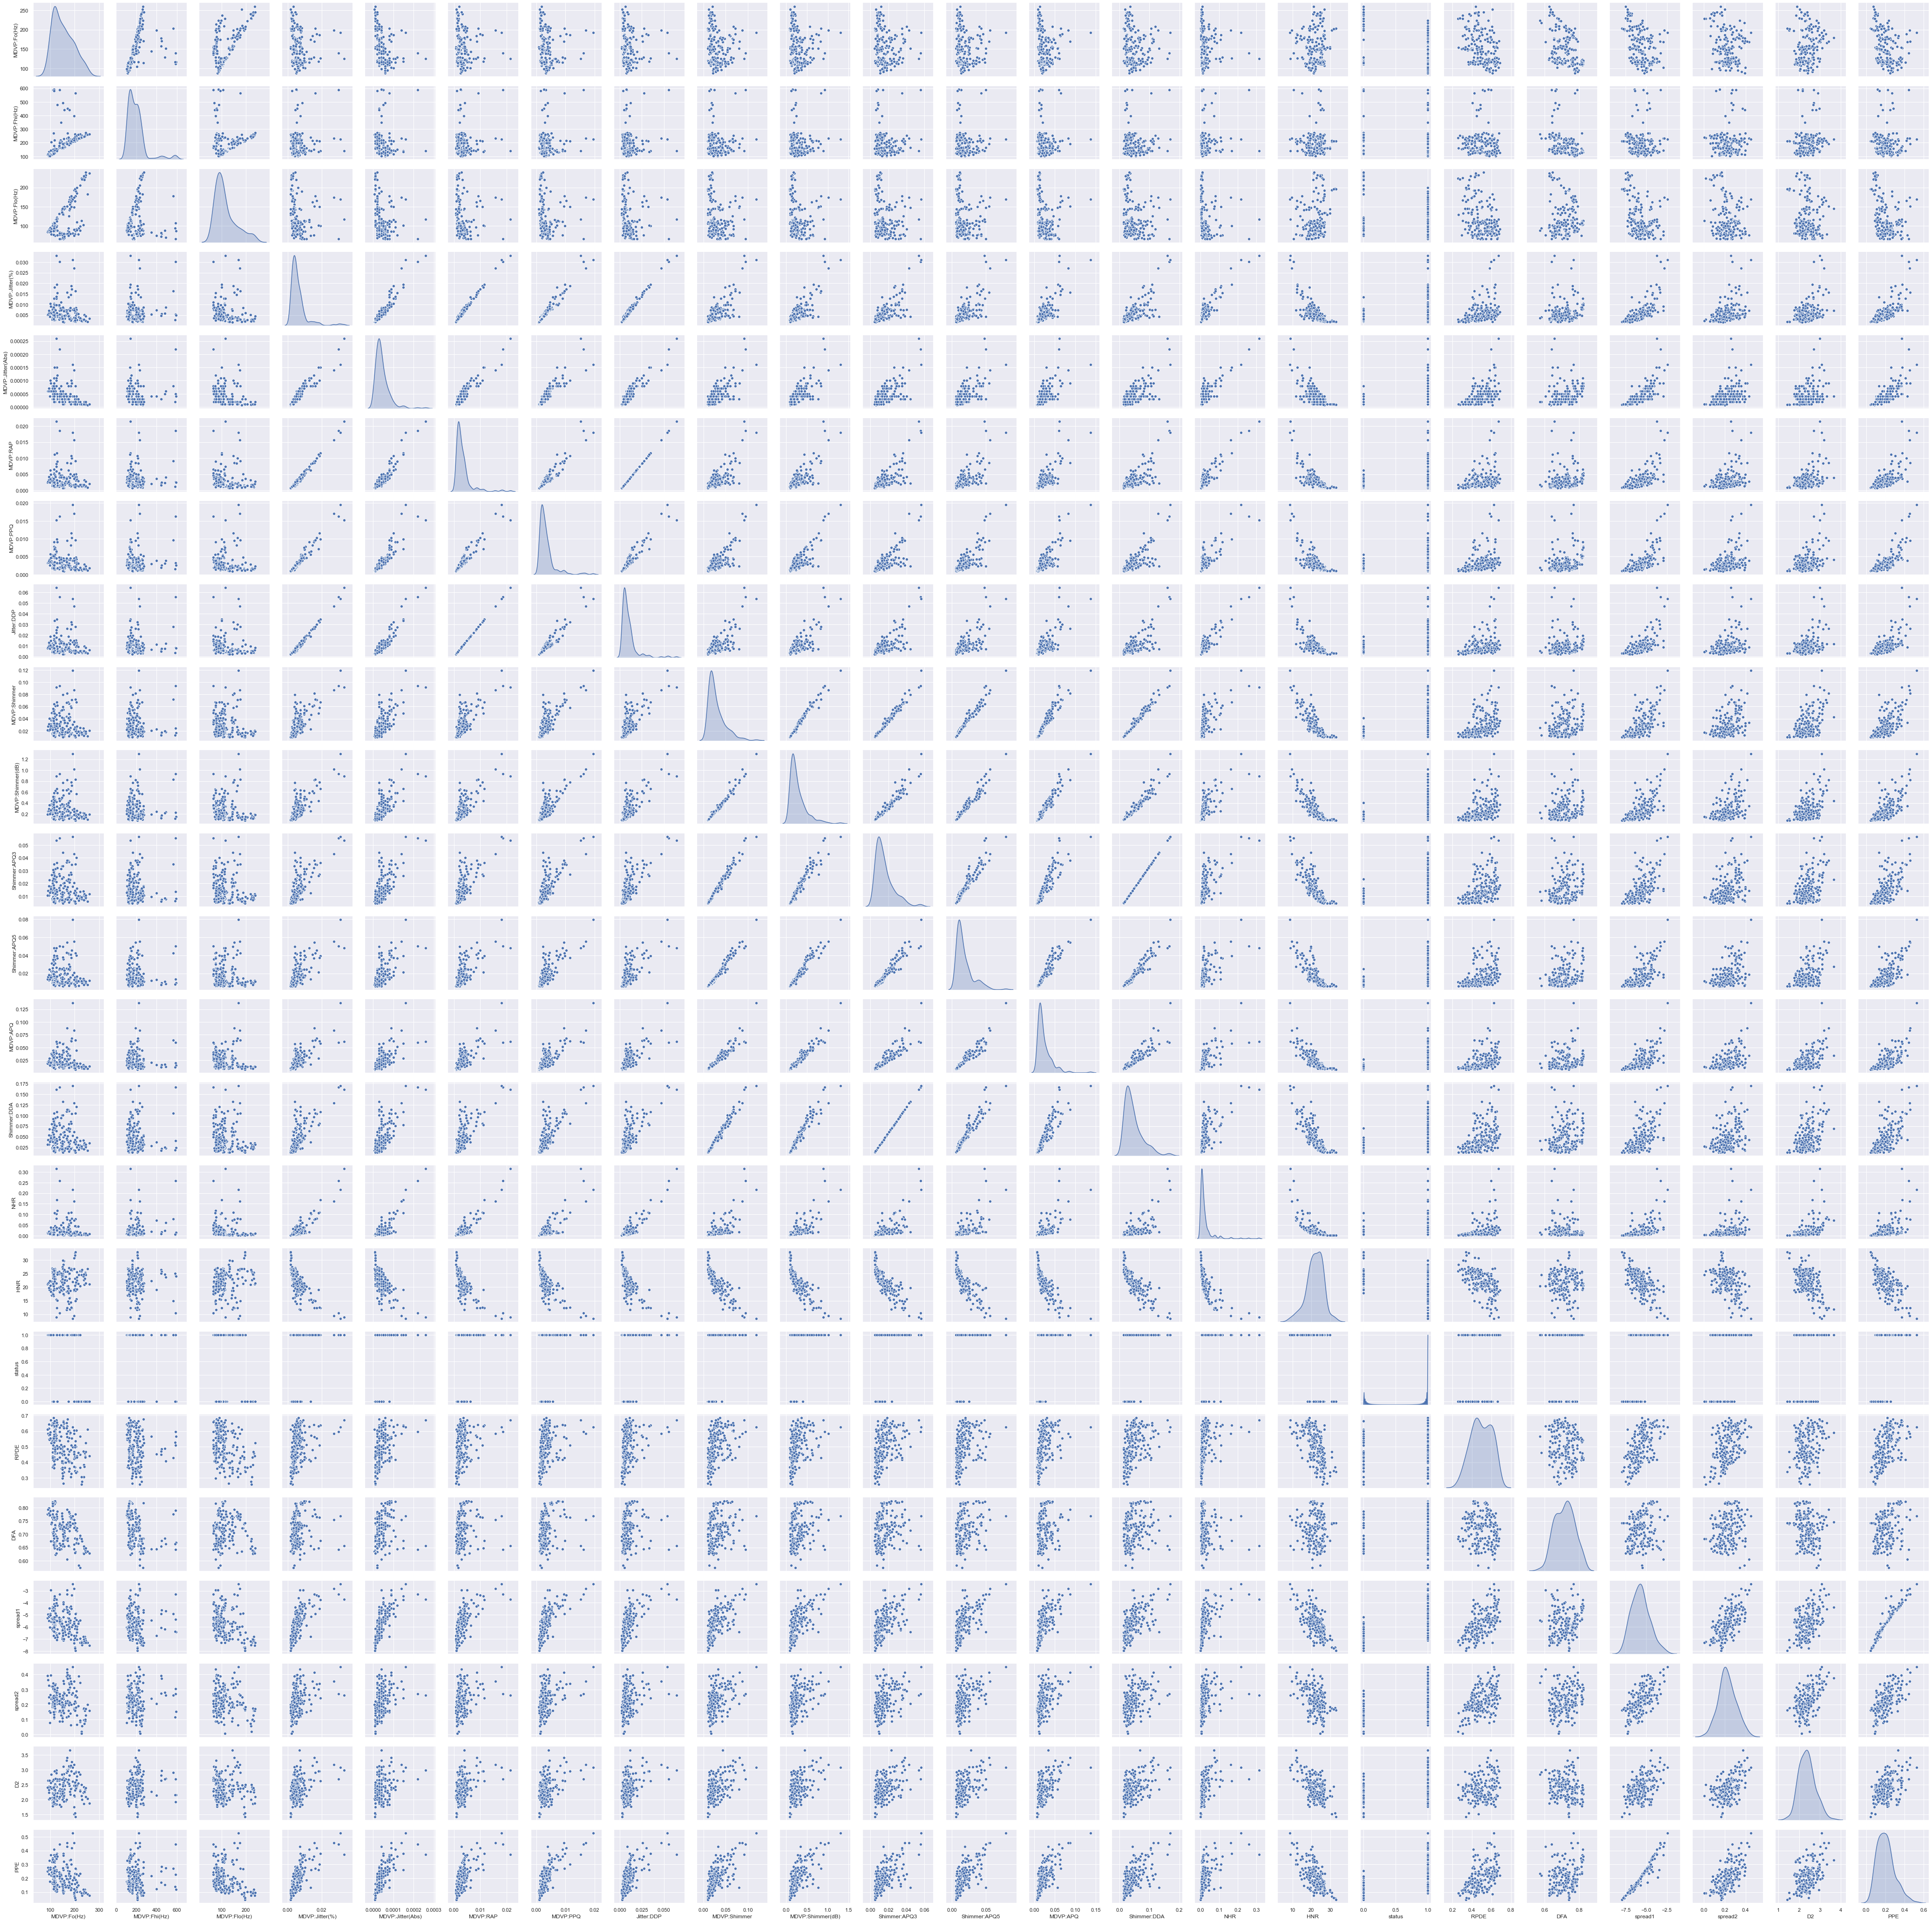

In [63]:
sns.pairplot(data,diag_kind="kde")

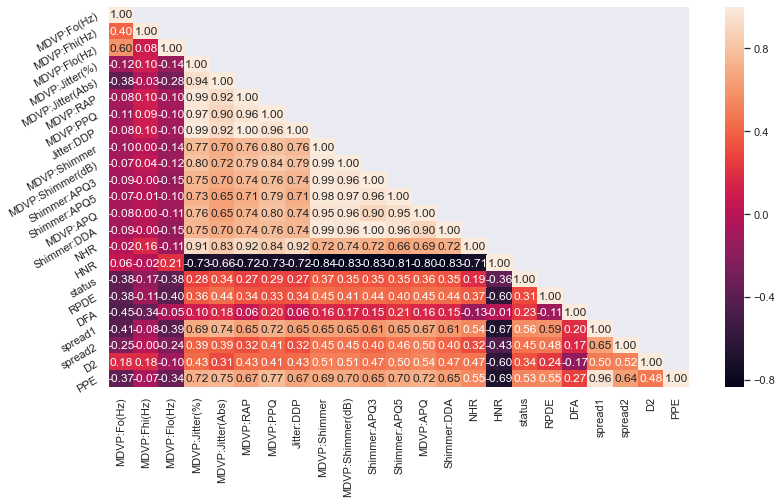

In [64]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [65]:
# "Status" correlation values in descending order
correlation_values=data.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

#### Analysis     
    
Variables within same measures are almost perfectly correlated to each other. **Several measures of variation in fundamental frequency**  and **Several measures of variation in amplitude** are correlated with each other with values between 0.92 to 1.00.

**Target Variable - "status" is moderatly correlated with "spread1" and "PPE"**   
    

### Analysis of the Target Variable vs Other variables

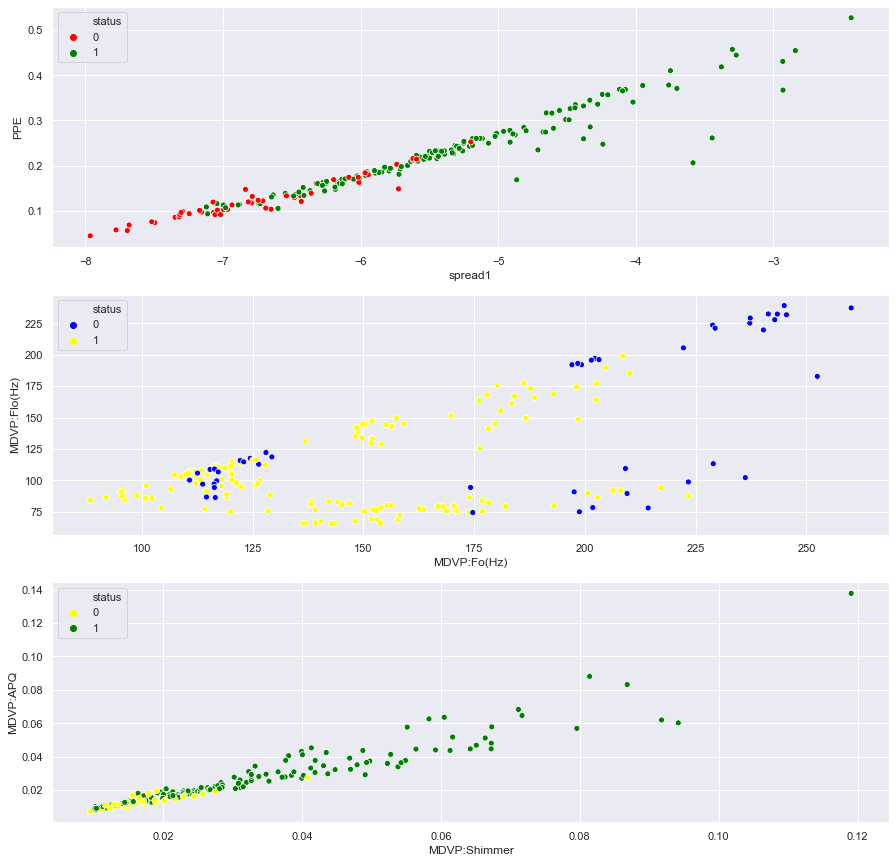

In [66]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(data.spread1, data.PPE, hue = data['status'], palette= ['red','green'])

plt.subplot(3,1,2)
sns.scatterplot(data['MDVP:Fo(Hz)'], data['MDVP:Flo(Hz)'], hue = data['status'], palette= ['blue','yellow'])

plt.subplot(3,1,3)
sns.scatterplot(data['MDVP:Shimmer'], data['MDVP:APQ'], hue = data['status'], palette= ['yellow','green'])

#### Analysis
1. The chart 1 clearly shows the correlation between **"spread1" and "PPE"** with impact on status. Lower values of spread1 and PPE have higher concentration of "status" being classified as "0" or "healthy".
2. Chart 2 shows that correlation of **"status" is relatively low with "MDVP:Flo(Hz)" and "MDVP:Fo(Hz)"**.
3. Chart 3 implies that though the correlation of "status" is moderate-low with "MDVP:Shimmer" and "MDVP:APQ"; but the **lower values of the two have higher concentration of "status" being classified as "0" or "healthy"**.

### Handling Outliers

In [128]:
# get the z-score of every value for the respective column
# z-score greater than 3 or less than -3 is generally taken as outlier in the data
import scipy.stats as stats
upperthreshold = 3 
lowerthreshold = -3 
cols=['MDVP:Fhi(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer(dB)','Shimmer:APQ5','MDVP:APQ','NHR']
z = np.abs(stats.zscore(data[cols]))
print('Z Score greater than 3 :', np.where(z>=upperthreshold))
print('Z Score lesser than -3 :', np.where(z<=lowerthreshold))
# Removing the outliers
data_cor = data[(z < 3).all(axis=1)]

Z Score greater than 3 : (array([ 73,  99,  99, 100, 100, 100, 100, 100, 100, 100, 102, 102, 102,
       102, 102, 102, 102, 102, 115, 120, 146, 146, 149, 151, 151, 151,
       151, 151, 151, 151, 151, 151, 152, 152, 152, 152, 152, 152, 152,
       152, 157, 186, 187], dtype=int64), array([0, 2, 9, 1, 2, 3, 4, 5, 6, 9, 0, 1, 2, 3, 4, 5, 6, 9, 0, 0, 7, 8,
       0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 3, 4, 5, 6, 7, 8, 9, 2, 0, 0],
      dtype=int64))
Z Score lesser than -3 : (array([], dtype=int64), array([], dtype=int64))


In [129]:
data_cor.shape

(182, 24)

In [130]:
data_cor.skew()

MDVP:Fo(Hz)         0.571822
MDVP:Fhi(Hz)        1.623139
MDVP:Flo(Hz)        1.247013
MDVP:Jitter(%)      1.665889
MDVP:Jitter(Abs)    1.030290
MDVP:RAP            1.812699
MDVP:PPQ            1.923585
Jitter:DDP          1.813027
MDVP:Shimmer        1.153050
MDVP:Shimmer(dB)    1.308801
Shimmer:APQ3        1.181719
Shimmer:APQ5        1.388456
MDVP:APQ            1.325490
Shimmer:DDA         1.181574
NHR                 2.613050
HNR                -0.151517
status             -1.147352
RPDE               -0.097040
DFA                -0.067671
spread1             0.262048
spread2             0.112918
D2                  0.444063
PPE                 0.548599
dtype: float64

In [131]:
data_cor["status"].value_counts().to_frame()

status
1     136
0      46

#### Analysis     
    
Outliers have been removed using the Z-Score. Z-Score of 3 is kept as threshold. We have removed the outliers instead of replacing the values with statistic value as these are individual reading. And the impact to rows is small as only about 7% of rows are impacted due to removal of outliers. Also the all the rows were common in most of the variables and thus properties of these rows would have changed by replacing multiple values.    

We can observe that skewness of data has improved significantly after removing the outliers.    

#### Label Encoder/One Hot Encoder

Encoding the Categorical values into numerical values is not required in this dataset. Because all values we have floating type only. We have "name" column as a categorical values but we are not going to use that column in model prediction.

## Split the data and Scale the data

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
scaler = StandardScaler();

XC = data_cor.drop(['name','status'],axis=1)     # Set of independent variables
YC = data_cor['status']                          # Predicted Variable
colscal=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP','MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA','spread1', 'spread2', 'D2', 'PPE']
scaler_xc = scaler.fit_transform(XC[colscal])
scaler_xc_train, scaler_xc_test, yc_train, yc_test = train_test_split(scaler_xc, YC, test_size=0.3, random_state=1)
# 1 is just any random seed number


Removed **name** column as it is only row identifer

In [219]:
print("{0:0.2f}% data is in training set".format((len(xo_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(xo_test)/len(data.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [220]:
scaler_xc_train[:5,:]

array([[-1.05333503, -0.92176333, -0.20732201, -0.17844565,  0.04098856,
        -0.14197184, -0.11960134, -0.142133  , -0.21499945, -0.28897497,
        -0.03929412, -0.35042522, -0.30911274, -0.03969408, -0.65104603,
         0.8014381 , -0.55133947,  1.7642362 ,  0.46423846, -0.2532696 ,
        -0.35751408,  0.56234121],
       [-1.02086485, -0.86289535, -0.43091543, -0.09356924,  0.46008511,
         0.03806977, -0.11392534,  0.03795107, -0.66631863, -0.69600367,
        -0.59557732, -0.64470177, -0.68273783, -0.59519651, -0.19417052,
        -0.26022093,  0.60225203, -0.8346179 ,  0.16139564, -0.4617037 ,
        -1.32281435,  0.16623355],
       [-0.42802686, -0.39767666,  0.33995538, -0.86085197, -0.79720453,
        -0.96667857, -0.85748079, -0.96509783, -0.99329478, -0.98292553,
        -0.9676291 , -0.96316545, -0.86076859, -0.9676583 , -0.6022999 ,
         0.86812206, -0.32479092, -1.31209288, -0.76580802, -0.85587942,
        -0.86079873, -0.74461924],
       [-1.05462714

In [255]:
yc_test.value_counts()

1    40
0    15
Name: status, dtype: int64

**Status as "1" - Postive: 40**      
**Status as "0" - Negative: 15**

## Model Building with Scaled Data

### Logistic Regression

In [324]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
LRmodel = LogisticRegression(solver="liblinear")
LRmodel.fit(scaler_xc_train, yc_train)
#predict on test
yc_predict = LRmodel.predict(scaler_xc_test)

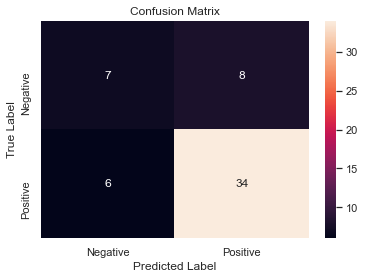

In [325]:

# Confusion Matrix
cm = metrics.confusion_matrix(yc_test, yc_predict)

class_label = ["Negative", "Positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [326]:
# Classification Report
print(metrics.classification_report(yc_test, yc_predict))

              precision    recall  f1-score   support

           0       0.54      0.47      0.50        15
           1       0.81      0.85      0.83        40

    accuracy                           0.75        55
   macro avg       0.67      0.66      0.66        55
weighted avg       0.74      0.75      0.74        55



In [327]:
LRmodel_score = LRmodel.score(scaler_xc_test, yc_test)
print('Model Score for Logistic Regression is: ',LRmodel_score)

Model Score for Logistic Regression is:  0.7454545454545455


### KNN 

In [226]:
# Creating odd list of K for KNN
myList = list(range(1,100))

# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [227]:
# Empty list that will hold accuracy scores
ac_scores = []
from sklearn.neighbors import KNeighborsClassifier
# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaler_xc_train, yc_train)
    
    # Predict the response
    yc_predict = knn.predict(scaler_xc_test)
    
    # Evaluate accuracy
    scores = metrics.accuracy_score(yc_test, yc_predict)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


In [228]:
knn = KNeighborsClassifier(n_neighbors= 1 , weights = 'uniform', metric = 'euclidean')
knn.fit(scaler_xc_train, yc_train)    
yc_predict = knn.predict(scaler_xc_test)
knn_acc = metrics.accuracy_score(yc_test, yc_predict)
print(knn_acc)

0.9272727272727272


Text(0, 0.5, 'Misclassification Error')

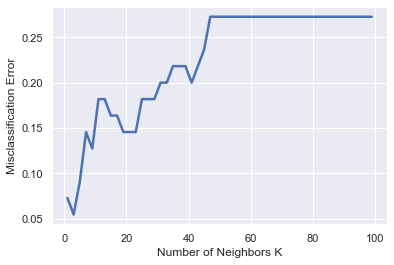

In [229]:
# Misclassification Error vs K
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

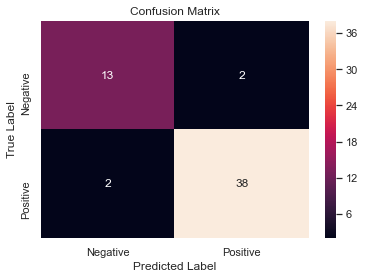

In [230]:
# Confusion Matrix
cm1 = metrics.confusion_matrix(yc_test, yc_predict)

class_label = ["Negative", "Positive"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [231]:
# Classification Report
print(metrics.classification_report(yc_test, yc_predict))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.95      0.95      0.95        40

    accuracy                           0.93        55
   macro avg       0.91      0.91      0.91        55
weighted avg       0.93      0.93      0.93        55



In [232]:
knnmodel_score = knn.score(scaler_xc_test, yc_test)
print('Model Score for KNN is: ',knnmodel_score)

Model Score for KNN is:  0.9272727272727272


### Naive Bayes

In [233]:
# Train Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
NB_model = GaussianNB()

NB_model.fit(scaler_xc_train, yc_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [234]:
# Performance of our model with training data
yc_train_predict = NB_model.predict(scaler_xc_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(yc_train, yc_train_predict)))

Model Accuracy: 0.7323


In [235]:
# Performance of our model with testing data
yc_test_predict = NB_model.predict(scaler_xc_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(yc_test, yc_test_predict)))

Model Accuracy: 0.7091


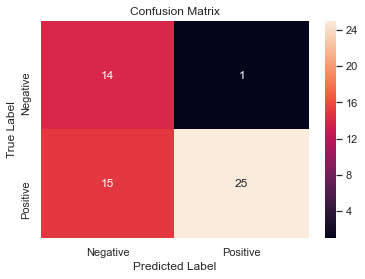

In [236]:
# Confusion Matrix
cm2 = metrics.confusion_matrix(yc_test, yc_test_predict)

class_label = ["Negative", "Positive"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [237]:
print("Classification Report")
print(metrics.classification_report(yc_test, yc_test_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.48      0.93      0.64        15
           1       0.96      0.62      0.76        40

    accuracy                           0.71        55
   macro avg       0.72      0.78      0.70        55
weighted avg       0.83      0.71      0.72        55



In [239]:
NB_model_score = NB_model.score(scaler_xc_test, yc_test)
print('Model Score for Naive Bayes is: ',NB_model_score)

Model Score for Naive Bayes is:  0.7090909090909091


### Decision Tree Model

In [240]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(scaler_xc_train, yc_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [241]:
print(dTree.score(scaler_xc_train, yc_train))
print(dTree.score(scaler_xc_test, yc_test))

1.0
0.7636363636363637


In [260]:
# Reduce overfitting by keeping the limit of depth to 3
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(scaler_xc_train, yc_train)
print(dTreeR.score(scaler_xc_train, yc_train))
print(dTreeR.score(scaler_xc_test, yc_test))

0.968503937007874
0.7818181818181819


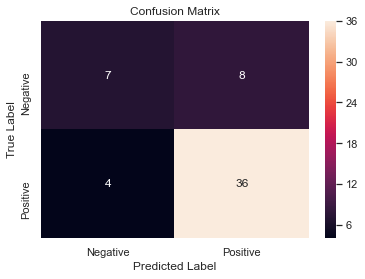

In [256]:
yc_predict = dTreeR.predict(scaler_xc_test)

# Confusion Matrix
cm3 = metrics.confusion_matrix(yc_test, yc_predict)

class_label = ["Negative", "Positive"]
df_cm3 = pd.DataFrame(cm3, index = class_label, columns = class_label)
sns.heatmap(df_cm3, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [257]:
print("Classification Report")
print(metrics.classification_report(yc_test, yc_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.47      0.54        15
           1       0.82      0.90      0.86        40

    accuracy                           0.78        55
   macro avg       0.73      0.68      0.70        55
weighted avg       0.77      0.78      0.77        55



In [258]:
DTree_score = dTreeR.score(scaler_xc_test, yc_test)
print('Model Score for Decision Tree is: ',DTree_score)

Model Score for Decision Tree is:  0.7818181818181819


### SVM Model

In [269]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3)   

In [270]:
clf.fit(scaler_xc_train , yc_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [271]:
yc_predict = clf.predict(scaler_xc_test)

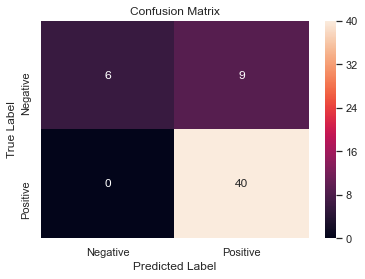

In [272]:
# Confusion Matrix
cm4 = metrics.confusion_matrix(yc_test, yc_predict)

class_label = ["Negative", "Positive"]
df_cm4 = pd.DataFrame(cm4, index = class_label, columns = class_label)
sns.heatmap(df_cm4, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [273]:
print("Classification Report")
print(metrics.classification_report(yc_test, yc_predict))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        15
           1       0.82      1.00      0.90        40

    accuracy                           0.84        55
   macro avg       0.91      0.70      0.74        55
weighted avg       0.87      0.84      0.81        55



In [274]:
SVM_score = clf.score(scaler_xc_test, yc_test)
print('Model Score for SVM is: ',SVM_score)

Model Score for SVM is:  0.8363636363636363


## Create Meta Classifier using Stacking

In [359]:
from mlxtend.classifier import StackingCVClassifier
# get a stacking ensemble of models
# define the base models
classifier1=svm.SVC(gamma='auto', C=3)
classifier2=DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
classifier3=GaussianNB()
classifier4=KNeighborsClassifier(n_neighbors= 1 , weights = 'uniform', metric = 'euclidean')
classifier5=LogisticRegression(solver="liblinear")
# define meta learner model
level1 = KNeighborsClassifier()
# define the stacking ensemble
stackm = StackingCVClassifier(classifiers=[classifier1, classifier2, classifier3, classifier4, classifier5], meta_classifier=level1, cv=5)

In [360]:
stackm.fit(scaler_xc_train , yc_train)

StackingCVClassifier(classifiers=[SVC(C=3, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma='auto', kernel='rbf',
                                      max_iter=-1, probability=False,
                                      random_state=None, shrinking=True,
                                      tol=0.001, verbose=False),
                                  DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_...
                     cv=5, drop_last_proba=False,
                     meta_classifier=KNeighborsClassifier(algorithm=

In [361]:
yc_predict = stackm.predict(scaler_xc_test)

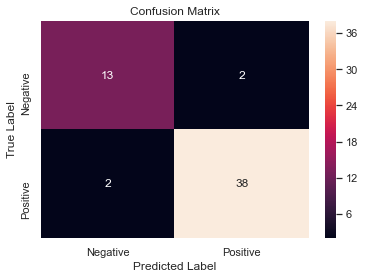

In [362]:
# Confusion Matrix
cm5 = metrics.confusion_matrix(yc_test, yc_predict)

class_label = ["Negative", "Positive"]
df_cm5 = pd.DataFrame(cm5, index = class_label, columns = class_label)
sns.heatmap(df_cm5, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [363]:
print("Classification Report")
print(metrics.classification_report(yc_test, yc_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.95      0.95      0.95        40

    accuracy                           0.93        55
   macro avg       0.91      0.91      0.91        55
weighted avg       0.93      0.93      0.93        55



In [364]:
stack_score = stackm.score(scaler_xc_test, yc_test)
print('Model Score for Stacking Model is: ',stack_score)

Model Score for Stacking Model is:  0.9272727272727272


##  Ensemble Model - Bagging

In [410]:
# Bagging Model using KNN as estimator
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=knn, n_estimators=50,random_state=1)

In [411]:
bgcl.fit(scaler_xc_train, yc_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='euclidean',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=1, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=50, n_jobs=None,
                  oob_score=False, random_state=1, verbose=0, warm_start=False)

In [412]:
yc_predict = bgcl.predict(scaler_xc_test)

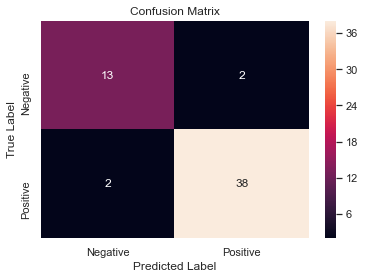

In [413]:
# Confusion Matrix
bgclcm = metrics.confusion_matrix(yc_test, yc_predict)

class_label = ["Negative", "Positive"]
df_bgclcm = pd.DataFrame(bgclcm, index = class_label, columns = class_label)
sns.heatmap(df_bgclcm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [414]:
print("Classification Report")
print(metrics.classification_report(yc_test, yc_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.95      0.95      0.95        40

    accuracy                           0.93        55
   macro avg       0.91      0.91      0.91        55
weighted avg       0.93      0.93      0.93        55



In [415]:
bgcl_score = bgcl.score(scaler_xc_test, yc_test)
print('Model Score for bagging Model using KNN is: ',bgcl_score)

Model Score for bagging Model using KNN is:  0.9272727272727272


In [416]:
# Bagging Model using Decision Tree as estimator
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

In [417]:
bgcl.fit(scaler_xc_train, yc_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [418]:
yc_predict = bgcl.predict(scaler_xc_test)

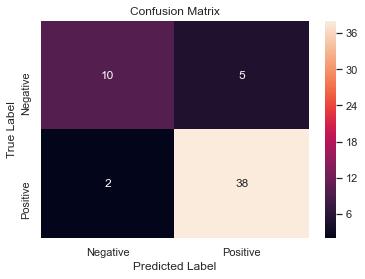

In [419]:
# Confusion Matrix
bgclcm = metrics.confusion_matrix(yc_test, yc_predict)

class_label = ["Negative", "Positive"]
df_bgclcm = pd.DataFrame(bgclcm, index = class_label, columns = class_label)
sns.heatmap(df_bgclcm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [420]:
print("Classification Report")
print(metrics.classification_report(yc_test, yc_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.88      0.95      0.92        40

    accuracy                           0.87        55
   macro avg       0.86      0.81      0.83        55
weighted avg       0.87      0.87      0.87        55



In [421]:
bgcl_score = bgcl.score(scaler_xc_test, yc_test)
print('Model Score for bagging Model using dTree is: ',bgcl_score)

Model Score for bagging Model using dTree is:  0.8727272727272727


#### Analysis      
Bagging Model does not have improvement on model KNN which had accuracy of 93%     
But **Bagging improved the accuracy of the weak classifier (in this case) Decision Tree model from 78% to 87%**

##  Ensemble Model - Gradient Boosting

In [396]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(scaler_xc_train, yc_train)

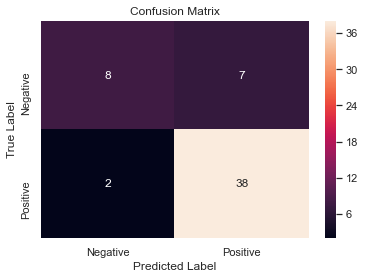

In [399]:
yc_predict = gbcl.predict(scaler_xc_test)
# Confusion Matrix
gboostcm = metrics.confusion_matrix(yc_test, yc_predict)

class_label = ["Negative", "Positive"]
df_gboostcm = pd.DataFrame(gboostcm, index = class_label, columns = class_label)
sns.heatmap(df_gboostcm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [402]:
print("Classification Report")
print(metrics.classification_report(yc_test, yc_predict))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.84      0.95      0.89        40

    accuracy                           0.84        55
   macro avg       0.82      0.74      0.77        55
weighted avg       0.83      0.84      0.82        55



In [400]:
gb_score = gbcl.score(scaler_xc_test, yc_test)
print('Model Score for Gradient Boosting Model is: ',gb_score)

Model Score for Gradient Boosting Model is:  0.8363636363636363


## Model Comparison using KFold function

>LR 0.855 (0.077)
>KNN 0.928 (0.070)
>DTree 0.840 (0.095)
>NB 0.699 (0.124)
>SVM 0.890 (0.059)
>Stack 0.926 (0.072)
>GdBoost 0.890 (0.069)
>AdBoost 0.887 (0.069)
>RForest 0.902 (0.065)


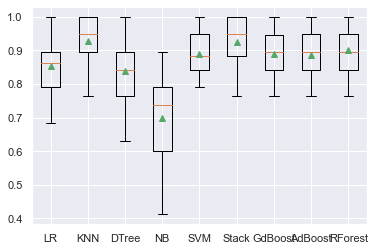

In [393]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier)

# get a list of models to evaluate
def get_models():
	models = dict()
	models['LR'] = LogisticRegression(solver="liblinear")
	models['KNN'] = KNeighborsClassifier(n_neighbors= 1 , weights = 'uniform', metric = 'euclidean')
	models['DTree'] = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
	models['NB'] = GaussianNB()
	models['SVM'] = svm.SVC(gamma=0.025, C=3)
	models['Stack'] = stackm
	models['GdBoost'] = GradientBoostingClassifier(n_estimators = 500,max_depth = 5, min_samples_leaf = 2, random_state=1)
	models['AdBoost'] = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.75)
	models['RForest'] = RandomForestClassifier(n_estimators = 500,max_depth = 6, min_samples_leaf = 2)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, scaler_xc, YC, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Model Comparison and Analysis      
           
Five models are used in the study (**Logistic Regression, KNN, Naive Bayes, Decision Tree and SVM**)   
**Comparing all models and accuracy:**    
**KNN is the best model given data to predict the classification of patients with disease ("1") or healthy ("0").***      
    
**Meta Classifier is created using the StackingVCClassifier function and stacked the five models together**

**Bagging Classification is used and has not added any further accuracy to KNN.**    
   
**GradientBoostingClassifier is also used to model the predictions.**   


### **MODEL COMPARISON**

1. Model Comparison is done with 9 models using individual classification models and Ensemble models of ADABOOST Classifier, Gradient Boosting Classifier, RandomForestClassifier
2. KNN and Stacking are almost similar in accuracy.
3. KNN seems to be still have better accuracy and marginally lower std. 

##                                                       ***** Assignment End ***** 